# Aufgabenblatt 10

## Regressionsanalyse

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Aufgabe 1

Im Statistischen Jahrbuch für die Bundesrepublik Deutschland des Jahres 1986 finden sich folgende Angaben über das durchschnittliche Heiratsalter von Männern und Frauen, die zum ersten Mal heiraten:

$$
\begin{array}{|c|c|c|c|}
  \hline
  % after \\: \hline or \cline{col1-col2} \cline{col3-col4} ...
  \mathrm{Nr.} & \mathrm{Jahr} & x_i (\mathrm{Männer}) & y_i (\mathrm{Frauen}) \\ \hline
  1 & 1971 & 26.0 & 23.7 \\
  2 & 1972 & 25.6 & 23.0 \\
  3 & 1973 & 25.5 & 22.9 \\
  4 & 1974 & 25.6 & 22.9 \\
  5 & 1975 & 25.3 & 22.7 \\
  6 & 1976 & 25.6 & 22.9 \\
  7 & 1977 & 25.7 & 22.9 \\
  8 & 1978 & 25.9 & 23.1 \\
  9 & 1979 & 26.0 & 23.2 \\
  10 & 1980 & 26.1 & 23.4 \\
  11 & 1981 & 26.3 & 23.6 \\
  12 & 1982 & 26.6 & 23.8 \\
  13 & 1983 & 26.9 & 24.1 \\
  14 & 1984 & 27.0 & 24.4 \\
  \hline
\end{array}
$$

Es wird angenommen, dass die Durchschnittswerte $y_i$ des Erstheiratsalters von Frauen durch unabhängige normalverteilte Zufallsvariablen $Y_i,i=1,\ldots,14$, beschrieben werden können. Ferner sei vorausgesetzt, dass diese Zufallsvariablen die gleiche Varianz $\sigma^2$ besitzen und die Erwartungswerte $E(Y_i)$ von der Form $E(Y_i)=a\cdot x_i+b$ sind, wobei $x_i$ das dazugehörige durchschnittliche Erstheiratsalter der Männer im $i$-ten Jahr ist.

a) Man berechne Maximum-Likelihood-Schätzwerte für die unbekannten Parameter $a$, $b$ und $\sigma^2$. Plotten Sie die Datenpunkte und fügen Sie die Regressionsgerade hinzu.  
b) Ist die Nullhypothese $b=0$ (das erwartete Durchschnittsalter der Frauen ist proportional zum Durchschnittsalter der Männer) auf dem 90\%-Niveau zu verwerfen?

In [ ]:
x <- c(26.0, 25.6, 25.5, 25.6, 25.3, 25.6, 25.7, 25.9, 26.0, 26.1, 26.3, 26.6, 26.9, 27.0)
y <- c(23.7, 23.0, 22.9, 22.9, 22.7, 22.9, 22.9, 23.1, 23.2, 23.4, 23.6, 23.8, 24.1, 24.4)

a)

Wir haben 14 Datenpaare $(x_i,y_i)$ für $i=1,…,14$

Das Modell lautet

$$Y_i  =  ax_i  +  b  +  ε_i$$

wobei

$$ε_i  ∼  N(0,σ2)$$

1. Maximum-Likelihood-Schätzer für aa und bb

Da die $ε_i$ normalverteilte, homoskedastische (Varianz $σ_2$) und unkorrelierte Fehler sind, stimmen die Maximum-Likelihood-Schätzer hier mit den gewöhnlichen Kleinste‐Quadrate-Schätzern (OLS) überein. Die bekannten Formeln lauten

1.1 Schätzer für $a$

$$\hat{a} = \frac{\sum\limits^n_{i=1}(x_i-\bar{x})(y_i-\bar{y})}{\sum\limits^n_{i=1}(x_i-\bar{x})^2} = \frac{\sum\limits^n_{i=1}x_iy_i-\frac{1}{n}(\sum\limits^n_{i=1}x_i)(\sum\limits^n_{i=1}y_i)}{\sum\limits^n_{i=1} - \frac{1}{n}(\sum\limits^n_{i=1}x_i)^2}$$

1.2 Schätzer für $b$

$$\hat{b} = \bar{y}-\hat{a}\bar{x} \text{ mit } \bar{x} = \frac{1}{n}\sum\limits^n_{i=1}x_i, \text{ } \bar{y} = \frac{1}{n}\sum\limits^n_{i=1}y_i$$

1.3 Schätzer für σ2σ2 (als MLE)

$$\sigma^2_{\text{ML}} = \frac{1}{n}\sum\limits^n_{i=1}(y_i-\hat{a}x_i-\hat{b})^2$$


2. Numerische Auswertung

In [25]:
import numpy as np

x = np.array([26.0, 25.6, 25.5, 25.6, 25.3, 25.6,
              25.7, 25.9, 26.0, 26.1, 26.3, 26.6, 26.9, 27.0])
y = np.array([23.7, 23.0, 22.9, 22.9, 22.7, 22.9,
              22.9, 23.1, 23.2, 23.4, 23.6, 23.8, 24.1, 24.4])

n = len(x)

# --- 1) Basic sums
sx   = x.sum()
sy   = y.sum()
sxx  = (x**2).sum()
sxy  = (x*y).sum()

print("Summe x =", sx)
print("Summe y =", sy)
print("Summe x^2 =", sxx)
print("Summe x*y =", sxy)

X = np.column_stack((x, np.ones_like(x)))
sol, residuals, rank, svals = np.linalg.lstsq(X, y, rcond=None)
a, b = sol  

SSE = np.sum((y - (a*x + b))**2)      
sigma2_ML = SSE / n

print(f"a (slope)      = {a:8.4f}")
print(f"b (intercept)  = {b:8.4f}")
print(f"SSE            = {SSE:8.4f}")
print(f"sigma^2 (MLE)  = {sigma2_ML:8.4f}")


Summe x = 364.1
Summe y = 326.59999999999997
Summe x^2 = 9472.79
Summe x*y = 8497.349999999999
a (slope)      =   0.9520
b (intercept)  =  -1.4313
SSE            =   0.2353
sigma^2 (MLE)  =   0.0168


$$\hat{y} = 0.952x-1.43$$

$$\sigma^2_{\text{MLE}} \approx 0.0168$$

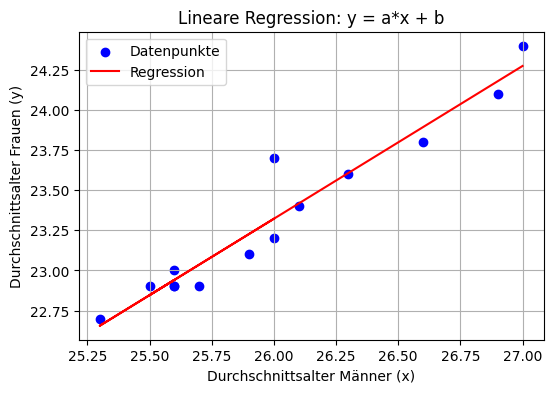

In [23]:
y_pred = a_hat * x + b_hat

plt.figure(figsize=(6,4))
plt.scatter(x, y, color="blue", label="Datenpunkte")
plt.plot(x, y_pred, color="red", label="Regression")
plt.xlabel("Durchschnittsalter Männer (x)")
plt.ylabel("Durchschnittsalter Frauen (y)")
plt.title("Lineare Regression: y = a*x + b")
plt.legend()
plt.grid(True)
plt.show()

b)Test der Nullhypothese $H_0 ⁣:b=0$ auf dem $90%$-Niveau

Wir wollen prüfen, ob das Achsenabschnitts-Glied bb möglicherweise null ist, also ob das Frauenalter (im Erwartungswert) rein proportional zum Männeralter ist (Modell: $E[Yi]=ax_i$).

Formal:
$H_0:b=0$ gegen $H_1:b \neq 0$

Teststatistik

In der einfachen linearen Regression kennen wir den (zweiseitigen) t‐Test für bb. Üblicherweise verwendet man dabei die geschätzte Standardabweichung

$$s=\sqrt{\frac{SSR}{n-2}}$$

und hernach

$$Var(\hat{b}) = s^2(\frac{1}{n}+\frac{\bar{x}^2}{S_{xx}})$$

Die Teststatistik ist dann

$$T = \frac{\hat{b}}{\sqrt{Var(\hat{b})}} ~ t_{n-2}$$

Setzen wir die Zahlen ein:

In [21]:
x = np.array([26.0, 25.6, 25.5, 25.6, 25.3, 25.6, 25.7, 25.9, 26.0, 26.1, 26.3, 26.6, 26.9, 27.0])
y = np.array([23.7, 23.0, 22.9, 22.9, 22.7, 22.9, 22.9, 23.1, 23.2, 23.4, 23.6, 23.8, 24.1, 24.4])

n = len(x)


x_mean = np.mean(x)
y_mean = np.mean(y)

S_xx = np.sum((x - x_mean)**2)
S_xy = np.sum((x - x_mean)*(y - y_mean))

a_hat = S_xy / S_xx
b_hat = y_mean - a_hat * x_mean

residuals = y - (a_hat * x + b_hat)
SSR = np.sum(residuals**2)

s2_unbiased = SSR / (n - 2)

Var_b = s2_unbiased * (1.0/n + (x_mean**2) / S_xx)
SE_b = np.sqrt(Var_b)

T_value = b_hat / SE_b

df = n - 2

alpha = 0.10
t_crit = stats.t.ppf(1 - alpha/2, df)

p_value = 2 * (1 - stats.t.cdf(abs(T_value), df))

print("=== Manuelle Testrechnung (b=0) ===")
print(f"b_hat              = {b_hat:.4f}")
print(f"SE(b_hat)          = {SE_b:.4f}")
print(f"T-Wert             = {T_value:.4f}")
print(f"t(krit; 90%-zweiseitig, df={df}) = ±{t_crit:.4f}")
print(f"p-Wert             = {p_value:.4f}")
if abs(T_value) > t_crit:
    print(f"Ergebnis: |T| > t_crit => H0 (b=0) wird verworfen (alpha={alpha}).")
else:
    print(f"Ergebnis: |T| < t_crit => H0 (b=0) wird NICHT verworfen (alpha={alpha}).")

=== Manuelle Testrechnung (b=0) ===
b_hat              = -1.4313
SE(b_hat)          = 1.9227
T-Wert             = -0.7444
t(krit; 90%-zweiseitig, df=12) = ±1.7823
p-Wert             = 0.4710
Ergebnis: |T| < t_crit => H0 (b=0) wird NICHT verworfen (alpha=0.1).


### Aufgabe 2

Wird ein Kondensator mit der Kapazität $C$ über einen Stromkreis mit dem Ohmschen Widerstand $R$ entladen, so ändert sich die Spannung in Abhängigkeit von der Zeit $t$ und der angelegten Anfangsspannung $U_0$ gemäß der Gleichung

$$U(t)=U_0\cdot e^{-t/(R\cdot C)}, t\geq0$$

Aufgrund dieser Gesetzmäßigkeit kann man über Spannungsmessungen das Produkt $R\cdot C$ ermitteln. Die tatsächlich gemessenen Spannungen sind jedoch aufgrund von Messfehlern und zufälligen Störungen nicht exakt durch dieses deterministische Gesetz gegeben, sondern weisen zufällige Abweichungen auf.

Der Entladungsvorgang sei durch folgendes Modell angemessen beschrieben: Werden $n$ Kondensatoren einer bestimmten Serie über denselben Stromkreis entladen und wird für das $i$-te Exemplar $t_i$ Sekunden nach Beginn des Entladungsvorganges die Spannung $u_i$ gemessen, so lassen sich die Zahlen $y_i=\ln{u_i},i=1,\ldots,n$, als Realisierung von unabhängigen normalverteilten Zufallsvariablen $Y_i, i=1,\ldots,n$, auffassen mit

$$E(Y_i)=\ln{U_0}-\frac{t_i}{R\cdot C}, Var(Y_i)=\sigma^2, i=1,\ldots,n$$

Ausgehend von folgenden Messergebnissen bestimme man mit den Methoden der linearen Regression konkrete Schätzintervalle zum Niveau 0.95 für $U_0$ und $R\cdot C$ sowie für die Varianz $\sigma^2$:

$$
\begin{array}{|c|c|c|c|c|c|c|c|c|c|c|c|c|}
  \hline
  % after \\: \hline or \cline{col1-col2} \cline{col3-col4} ...
  t_i & 2.0 & 2.0 & 2.0 & 2.0 & 4.0 & 4.0 & 4.0 & 4.0 & 6.0 & 6.0 & 6.0 & 6.0 \\ \hline
  u_i & 5.10 & 5.12 & 5.13 & 4.98 & 3.43 & 3.40 & 3.41 & 3.46 & 2.24 & 2.25 & 2.30 & 2.35 \\
  \hline
\end{array}
$$

In [ ]:
t = c(2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, 4.0, 6.0, 6.0, 6.0, 6.0)
u = c(5.10, 5.12, 5.13, 4.98, 3.43, 3.40, 3.41, 3.46, 2.24, 2.25, 2.30, 2.35)

### Aufgabe 3

Es sei $X_1$ die Anzahl der in Gebrauch befindlichen Autos (Millionen), $X_2$ die Anzahl der in Gebrauch befindlichen Lastwagen (Millionen) und $Y$ der Benzinverbrauch in Millionen Barrels. Wir möchten die Regression von $Y$ auf $X_1$ und $X_2$ ermitteln, d.h.: $y_c=a+b_1x_1+b_2x_2$.

$$
\begin{array}{|r|r|r|}
  \hline
  X_1 & X_2 & Y \\ \hline
%   after \\: \hline or \cline{col1-col2} \cline{col3-col4} ...
  36 & 8 & 990   \\ 
  40 & 8 & 1140   \\ 
  44 & 9 & 1230   \\ 
  47 & 9 & 1320   \\ 
  50 & 10 & 1370   \\ 
  \hline
\end{array}
$$

a) Man schätze $a$, $b_1$, $b_2$.  
b) Man schätze $\sigma^2$.  
c) Man schätze $Var(b_1)$ und $Var(b_2)$.

In [ ]:
x1 <- c(36, 40, 44, 47, 50)
x2 <- c(8, 8, 9, 9, 10)
y <- c(990, 1140, 1230, 1320, 1370)

1) Schätzung von $a$, $b_1$ und $b_2$

In der klassischen linearen Regression werden die Parameter durch das Kleinste-Quadrate-Verfahren bestimmt.

$$\beta  =  (X^TX)^{-1} X^⊤y,$$

wobei

$\beta=(a,b_1,b_2)^⊤$ der (unbekannte) Parametervektor ist,

$X$ die Designmatrix ist, die in Spalte 1 nur Einsen (für den Intercept aa) hat, in Spalte 2 die Werte von $X_1$, in Spalte 3 die Werte von $X_2$,

$y$ der Vektor der beobachteten $Y$-Werte ist.

In [35]:
X1 = np.array([36, 40, 44, 47, 50], dtype=float)
X2 = np.array([ 8,  8,  9,  9, 10], dtype=float)
Y  = np.array([990, 1140, 1230, 1320, 1370], dtype=float)

n = len(Y) 

X = np.column_stack((np.ones(n), X1, X2))

XtX = X.T @ X
Xty = X.T @ Y

beta_hat = np.linalg.inv(XtX) @ Xty

a_hat, b1_hat, b2_hat = beta_hat

print("Geschätztes a (Intercept)  =", a_hat)
print("Geschätztes b1            =", b1_hat)
print("Geschätztes b2            =", b2_hat)

Geschätztes a (Intercept)  = 195.26066350718145
Geschätztes b1            = 35.40284360189478
Geschätztes b2            = -59.28909952604321


2) Schätzung von $\sigma^2$
Mathematische Herleitung

Die geschätzten (oder gefitteten) Werte $\hat{y}_i$ für jeden Datenpunkt ergeben sich aus:

$$\hat{y}_i = \hat{a}+\hat{b}_1x_{1,i}+\hat{b}_2x_{2,i} <=> \hat{y} = X\hat{\beta}$$

Die Residuen (Abweichungen) sind:

$$e_i = y_i-\hat{y}_i$$

Die Summe der Residuenquadrate ($SSE$) ist:
$$SSE = \sum\limits^n_{i=1}(y_i-\hat{y}_i)^2 = \sum\limits^n_{i=1}e^2_i$$


Zur Schätzung der Fehlervarianz σ2σ2 benutzt man:

$$\sigma^2 = \frac{SSE}{n-p}$$

wobei $p$ die Anzahl geschätzter Parameter ist (hier $p=3$ für $a,b_1,b_2$).

In [34]:
y_hat = X @ beta_hat

residuals = Y - y_hat

SSE = np.sum(residuals**2)

p = 3  
sigma2_hat = SSE / (n - p)

print("\nSSE =", SSE)
print("Geschätzte Residuenvarianz σ^2 =", sigma2_hat)


SSE = 188.6255924170582
Geschätzte Residuenvarianz σ^2 = 94.3127962085291


3) Schätzung von $Var(\hat{b}_1)$ und $Var(\hat{b}_2)$

Aus der Theorie der linearen Regression weiß man:

$$Cov(\hat{\beta}) = \sigma^2(X^TX)^{-1}$$

Die diagonalen Elemente dieser Kovarianzmatrix liefern die Varianzen der jeweiligen Parameter:

$$Var(\hat{a}) = \hat{\sigma}^2⋅[(X^TX)^{−1}]_{11}, Var(\hat{b}_1) = \hat{\sigma}^2⋅[(X^TX)^{−1}]_{22}, Var(\hat{b}_2) = \hat{\sigma}^2⋅[(X^TX)^{−1}]_{33}$$

In [33]:
XtX_inv = np.linalg.inv(XtX)
print(XtX_inv)
cov_beta = sigma2_hat * XtX_inv

var_a_hat  = cov_beta[0,0]
var_b1_hat = cov_beta[1,1]
var_b2_hat = cov_beta[2,2]

print("Var(a_hat)  =", var_a_hat)
print("Var(b1_hat) =", var_b1_hat)
print("Var(b2_hat) =", var_b2_hat)

[[36.30805687  0.74881517 -7.79620853]
 [ 0.74881517  0.06635071 -0.41232227]
 [-7.79620853 -0.41232227  2.91943128]]
Var(a_hat)  = 3424.3143685002237
Var(b1_hat) = 6.257721075447518
Var(b2_hat) = 275.3397273196913


Zusammenfassung der Ergebnisse

Regressionsgleichung

$$\hat{y} = 195.3+35.4x_1-59.3x_2$$

Residuenvarianz

$$\hat{\sigma}^2 \approx 94.3$$

Varianzen von $\hat{b}_1$ und $\hat{b}_1$

$$Var(\hat{b}_1) \approx 6.26, Var(\hat{b}_2) \approx 275.34$$

### Aufgabe 4


$X\ldots$ Produktionsmenge, $Y\ldots$ Gesamtkosten

$$
\begin{array}{|l|r|r|r|r|r|r|r|r|r|r|r|r|r|r|}
  \hline
%   after \\: \hline or \cline{col1-col2} \cline{col3-col4} ...
  X & 49 & 25 & 60 & 30 & 58 & 65 & 55 & 20 & 40 & 35 & 30 & 45 \\ \hline
  Y & 214 & 112 & 265 & 142 & 250 & 275 & 240 & 104 & 175 & 165 & 128 & 205 \\
  \hline
\end{array}
$$

Bestimmen Sie:

a) $\hat{y}=a+bx$  
b) das Bestimmtheitsmaß  
c) ein 99\% Konfidenzintervall für die durchschnittlichen Gesamtkosten mit einer Produktionsmenge von $x_0=52$ Stück  
d) ein 95\% Prognoseintervall für die Gesamtkosten mit einer Produktionsmenge von $x_0=70$ Stück


In [ ]:
x <- c(49, 25, 60, 30, 58, 65, 55, 20, 40, 35, 30, 45)
y <- c(214, 112, 265, 142, 250, 275, 240, 104, 175, 165, 128, 205)

### Aufgabe 5

$$
\begin{array}{|l|r|r|r|r|r|}
  \hline
%   after \\: \hline or \cline{col1-col2} \cline{col3-col4} ...
  X & 0 & 1 & 2 & 3 & 4    \\ \hline
  Y & 130 & 145 & 150 & 165 & 170 \\
  \hline
\end{array}
$$

a) Berechnen Sie das Bestimmtheitsmaß.  
b) Testen Sie mit Hilfe eines F-Tests ($\alpha=0.05$) die Hypothese, dass in der Grundgesamtheit kein Zusammenhang zwischen den Variablen $X$ und $Y$ besteht.

In [ ]:
x <- seq(0,4)
y <- c(130, 145, 150, 165, 170)

In [37]:
import numpy as np
from scipy.stats import f

# ============================
# 1) Daten
# ============================
X_data = np.array([0, 1, 2, 3, 4], dtype=float)
Y_data = np.array([130, 145, 150, 165, 170], dtype=float)

n = len(Y_data)

# ============================
# 2) Designmatrix
# ============================
X_mat = np.column_stack((np.ones(n), X_data))

# ============================
# 3) OLS-Schätzung
# ============================
XtX = X_mat.T @ X_mat
Xty = X_mat.T @ Y_data
beta_hat = np.linalg.inv(XtX) @ Xty

a_hat, b_hat = beta_hat

print("a_hat =", a_hat)
print("b_hat =", b_hat)

# ============================
# 4) Bestimmtheitsmaß R^2
# ============================
Y_hat = X_mat @ beta_hat
Y_mean = np.mean(Y_data)

SST = np.sum((Y_data - Y_mean)**2)
SSE = np.sum((Y_data - Y_hat)**2)
SSR = SST - SSE

R2 = SSR / SST

print("\nSST =", SST)
print("SSE =", SSE)
print("SSR =", SSR)
print("R^2 =", R2)

# 5) F-Test

df_reg = 1      # wir haben nur 1 Regressor
df_err = n - 2  # Schätzung von a und b

MSR = SSR / df_reg
MSE = SSE / df_err

F_stat = MSR / MSE

print("\nF =", F_stat)

alpha = 0.05
F_crit = f.ppf(1 - alpha, df_reg, df_err)
print("F_crit(0.05; 1,3) =", F_crit)

if F_stat > F_crit:
    print("Ergebnis: H0 wird verworfen => Es besteht ein signifikanter linearer Zusammenhang.")
else:
    print("Ergebnis: H0 kann nicht verworfen werden => Kein signifikanter Zusammenhang.")

a_hat = 132.00000000000006
b_hat = 9.999999999999991

SST = 1030.0
SSE = 29.999999999999943
SSR = 1000.0
R^2 = 0.970873786407767

F = 100.0000000000002
F_crit(0.05; 1,3) = 10.127964486013928
Ergebnis: H0 wird verworfen => Es besteht ein signifikanter linearer Zusammenhang.


### Aufgabe 6

In Wien werden seit 1775 monatliche Durchschnittstemperaturen registriert. Seien $x_1,\ldots,$ $x_{201}$ bzw. $y_1,\ldots,y_{201}$ die Durchschnittstemperaturen in $^\circ$C für die Monate Januar bzw. Februar in den Jahren 1775 bis einschließlich 1975. Wir nehmen an, dass die Messreihe $y_1,\ldots,y_{201}$ eine Realisierung von unabhängigen normalverteilten Zufallsvariablen $Y_1,\ldots,$ $Y_{201}$ ist und dass für $i=1,\ldots,201$

$$E(Y_i)=a\cdot x_i+b, Var(Y_i)=\sigma^2$$

gilt. Die 201 Messungen lieferten folgende Kennzahlen

$$\overline{x}=-1.569,\overline{y}=0.051,\sum_{i=1}^{201}(x_i-\overline{x})^2=1649.7, \sum_{i=1}^{201}(y_i-\overline{y})^2=1567.9, \sum_{i=1}^{201}(x_i-\overline{x})(y_i-\overline{y})=513.0$$

Man berechne mit Hilfe der linearen Regression ein Prognoseintervall zum Niveau 0.9 für die durchschnittliche Februartemperatur, wenn im Januar durchschnittlich $-2^\circ$C beobachtet wurde.

### Aufgabe 7

In Fortsetzung der vorangegangenen Aufgabe berechne man ein Prognoseintervall ohne Berücksichtigung der Information über die Temperatur im Januar. Man setze lediglich voraus, dass die Zufallsvariablen $Y_1,\ldots,Y_{201}$ unabhängig und identisch normalverteilt sind.

*Hinweis:* Man zeige zunächst: Sind $Y$ und $Y_1,\ldots,Y_{201}$ unabhängig und besitzt $Y$ dieselbe Verteilung wie $Y_1,\ldots,Y_{201}$, so gilt mit Wahrscheinlichkeit $1-\alpha$

$$\overline{Y}-V\leq Y\leq \overline{Y}+V$$

wobei $V=t_{200;0.95}\cdot\sqrt{\frac{202}{201\cdot200}\cdot\sum_{i=1}^{201}(y_i-\overline{y})^2}$ zu setzen ist.

Zufallsgrößen und Verteilungen

$\bar{Y}$ ist normalverteilt mit

$$\bar{Y} ∼ N⁣(\mu,  \frac{\sigma^2}{n})$$

$Y$ ist ebenfalls $N⁣(\mu,  \frac{\sigma^2}{n})$ verteilt und unabhängig von $\bar{Y}$

Der Unterschied $Y−\bar{Y}$ folgt einer Normalverteilung mit:
    $$Y−\bar{Y} ∼ N⁣(\mu,  \sigma^2 +\frac{\sigma^2}{n})  =  N⁣(\mu,  \sigma^2 (1 +\frac{1}{n}))$$

Wir wollen ein Intervall $\bar{Y} \pm V$ so bestimmen, dass

$$P(\overline{Y}-V\leq Y\leq \overline{Y}+V) = 1-\alpha$$

Das ist äquivalent zu

$$P(|Y-\overline{Y}|\leq V) = 1-\alpha$$
P(∣Y−Y∣≤V)=1−α.



Ersetzen von $\sigma^2$ durch die Stichprobenvarianz

Da $\sigma^2$ unbekannt ist, verwenden wir den Schätzer $S_2$. Für eine i.i.d. normalverteilte Stichprobe gilt bekanntlich:

$$\frac{(n-1)S^2}{\sigma^2} ~ \chi^2_{n-1}$$

Außerdem führt man den sogenannten t-Statistik-Ansatz ein:

$$T = \frac{Y-\bar{Y}/\sqrt{1+\frac{1}{n}}}{\sqrt{S^2}}$$

denn $Y-\bar{Y}$ ist normalverteilt mit Varianz $\sigma^2(1+\frac{1}{n})$, und $\frac{S^2}{\sigma^2}$ ist $\chi^2$-verteilt (unabhängig von $Y-\bar{Y}$). Daraus ergibt sich die t-Verteilung mit $n−1$ Freiheitsgraden.



Konfidenzbereich / Prognosebereich

Aus der t-Verteilung folgt für ein zweiseitiges Konfidenzniveau $1−\alpha$:

$$P ⁣(−t_{n−1;1−\alpha/2}  \leq  T  ≤  + t_{n−1;1−\alpha/2})  =  1−\alpha$$

Das bedeutet

$$∣T∣ ≤ t_{n−1;1−\alpha/2} <=> ∣Y-\bar{Y}∣  \leq  t_{n−1;1−\alpha/2}\sqrt{S^2 (1+\frac{1}{n})}$$

Bezeichnet man nun


$$V = t_{n−1;1−\alpha/2}\sqrt{S^2 (1+\frac{1}{n})}$$

dann ist

$$P(\overline{Y}-V\leq Y\leq \overline{Y}+V) = 1-\alpha$$

2.4 Spezialisierung auf n=201n=201

Im konkreten Fall haben wir $n=201$. Dann:

$\bar{Y} = \frac{1}{201}\sum\limits^{201}_{i=1}y_i$

$S^2 = \frac{1}{200}\sum\limits^{201}_{i=1}(y_i-\bar{y}_i)^2$

$1+\frac{1}{n} = \frac{202}{201}$

Daher

$$V = t_{200;1−\alpha/2}\sqrt{\frac{1}{200}\sum\limits^{201}_{i=1}(y_i-\bar{y}_i)^2 * \frac{202}{201}}$$

Rechnet man den Vorfaktor zusammen, erhält man genau

$$V = t_{200;0.95}\sqrt{\frac{202}{201*200}\sum\limits^{201}_{i=1}(y_i-\bar{y}_i)^2}$$

### Aufgabe 8

Gegeben sei eine Stichprobe folgender Wertpaare:

$x_i$: 5.5 2.4 4.8 12.9 9.4 7.8 14.9 11.2 12.9 12.1 9.8 3.1

$y_i$: 31.5 15.2 31.6 76.8 57.7 43.3 83.5 70.2 70.1 68.5 52.7 29.3

a) Man berechne die lineare Regressionsfunktion. Plotten Sie die Datenpunkte und fügen Sie die Regressionsgerade hinzu.  
b) Man überprüfe mittels Kolmogoroff-Smirnov-Test ($\alpha=0.05$), ob die Abweichungen von der Regressionsgeraden normalverteilt sind.

In [ ]:
x <- c(5.5, 2.4, 4.8, 12.9, 9.4, 7.8, 14.9, 11.2, 12.9, 12.1, 9.8, 3.1)
y <- c(31.5, 15.2, 31.6, 76.8, 57.7, 43.3, 83.5, 70.2, 70.1, 68.5, 52.7, 29.3)